## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tqdm import tqdm
import cv2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow

In [5]:
print(tensorflow.__version__)

2.2.0-rc2


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [6]:
drive.mount('/content/drive')
project_path = "/content/drive/My Drive/ColabNotebooks/R7_CNN/data/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive



Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
# Loading the Train Data
from zipfile import ZipFile
with ZipFile(project_path+'dog_breed_train.zip', 'r') as z:
  z.extractall()

In [0]:
# Loading the test data
with ZipFile(project_path+'dog_breed_test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [10]:
y_labels = pd.read_csv('labels.csv')
y_labels.shape

(10222, 2)

### Print the count of each category of Dogs given in the dataset



In [11]:
y_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
y_labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [13]:
num_classes = len(y_labels['breed'].value_counts())
print("Number of Dog Breed Types : ", num_classes)

Number of Dog Breed Types :  120


In [14]:
dog_labels = np.unique(y_labels['breed'])
print(dog_labels[0])
print(dog_labels.shape)

affenpinscher
(120,)


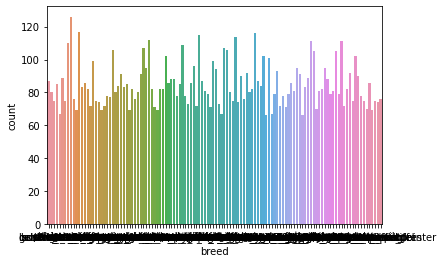

In [15]:
sns.countplot(y_labels['breed'])

### Get one-hot encodings of labels

In [0]:
ohe = OneHotEncoder(sparse=True)
le = LabelEncoder()
labels = pd.Series(y_labels['breed'])
le_encoded = le.fit_transform(labels)

In [17]:
labels.dtype

dtype('O')

In [0]:
#le_encoded = le_encoded.reshape(len(le_encoded),1)

In [18]:
print(le_encoded[1350])
print(len(le_encoded))

49
10222


In [0]:
#y_ohe_labels = ohe.fit_transform(le_encoded)

In [0]:
#y_ohe_labels

<10222x120 sparse matrix of type '<class 'numpy.float64'>'
	with 10222 stored elements in Compressed Sparse Row format>

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128

In [21]:
x_train = []
y_train = []
for id, breed in tqdm(y_labels.values):
  img = cv2.imread('./train/{}.jpg'.format(id), 1)
  img_resize = cv2.resize(img, (img_rows, img_cols))
  x_train.append(img_resize)
  y_train.append(breed)

100%|██████████| 10222/10222 [00:31<00:00, 326.04it/s]


In [0]:
y_train = pd.Series(y_train)
y_train = le.fit_transform(y_train)

**Checking the dimension on shape for one of the input images**

In [23]:
img1 = cv2.imread('./train/{}.jpg'.format(y_labels.values[0][0]), 1)
print(img1.shape)
type(img1)

(375, 500, 3)


numpy.ndarray

**Checking the type of Train Data**

In [24]:
print("x_train type before casting : ", type(x_train))
print("y_train type before casting : ", type(y_train))

x_train type before casting :  <class 'list'>
y_train type before casting :  <class 'numpy.ndarray'>


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [25]:
x_train = np.asarray(x_train, np.float32)
y_train = np.asarray(y_train)
print("x_train type after casting : ", type(x_train))
print("y_train type after casting : ", type(y_train))
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)

x_train type after casting :  <class 'numpy.ndarray'>
y_train type after casting :  <class 'numpy.ndarray'>
x_train shape :  (10222, 128, 128, 3)
y_train shape :  (10222,)


In [26]:
#Normalizing the input
x_train /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (10222, 128, 128, 3)
10222 train samples


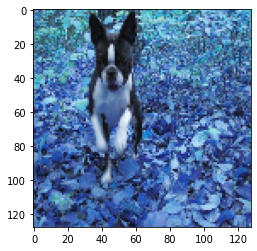

In [27]:
plt.imshow(x_train[0])

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [28]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_train, y_train, random_state=42)
print(y_train_data[0])
print(y_test_data[0])

94
111


In [29]:
print("x_train_data shape : ", x_train_data.shape)
print("y_train_date shape : ", y_train_data.shape)
print("x_test_data shape : ", x_test_data.shape)
print("y_test_date shape : ", y_test_data.shape)

x_train_data shape :  (7666, 128, 128, 3)
y_train_date shape :  (7666,)
x_test_data shape :  (2556, 128, 128, 3)
y_test_date shape :  (2556,)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = pd.read_csv('sample_submission.csv')

In [0]:
test_img.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img.shape

(10357, 121)

In [0]:
test_img = test_img['id']

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:33<00:00, 310.57it/s]


In [0]:
len(x_test_feature)

10357

In [0]:
x_test_feature[3230].shape

(128, 128, 3)

In [0]:
print('x_test_feature type : ', type(x_test_feature))

x_test_feature type :  <class 'list'>


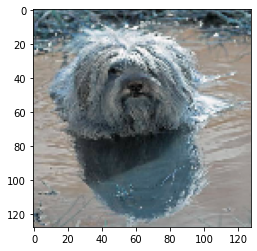

In [0]:
plt.imshow(x_test_feature[10])

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.asarray(x_test_feature, dtype=np.float32)

In [0]:
#Normalizing the input
x_test_feature /= 255.0
print('x_test_feature shape:', x_test_feature.shape)
print(x_test_feature.shape[0], 'train samples')

x_test_feature shape: (10357, 128, 128, 3)
10357 train samples


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
#import tensorflow as tf
#import keras

# TF 1.x
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#TF 2.x
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, Dense
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.losses import categorical_crossentropy

In [0]:
input_shape = (img_rows, img_cols, 3)

In [0]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape, name='Conv_1'))

  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', name='Conv_2'))

  model.add(Flatten())
  model.add(Dense(256, activation='relu', name='Dense_1'))

  #Using num_classes as the neurons for final layes, as it has to classify
  model.add(Dense(num_classes, activation='softmax'))
  return model

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
def compile_model(model):
  optimizer = Adam()
  #Set the loss function and optimizer for the model training
  model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
  model.summary()
  return model

In [72]:
y_train_categorical = to_categorical(y_train_data, num_classes)
y_test_categorical = to_categorical(y_test_data, num_classes)
print("x_train_data shape : ", x_train_data.shape)
print("y_train_categorical shape : ", y_train_categorical.shape)
print("\n")
print("x_test_data shape : ", x_test_data.shape)
print("y_test_categorical shape : ", y_test_categorical.shape)

x_train_data shape :  (7666, 128, 128, 3)
y_train_categorical shape :  (7666, 120)


x_test_data shape :  (2556, 128, 128, 3)
y_test_categorical shape :  (2556, 120)


In [0]:
batch_size=128
epoch=10

In [0]:
model = create_model()
model = compile_model(model)
history = model.fit(x_train_data, y_train_categorical, batch_size=batch_size, epochs=epoch, validation_split=0.1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
Conv_2 (Conv2D)              (None, 122, 122, 32)      9248      
_________________________________________________________________
flatten_13 (Flatten)         (None, 476288)            0         
_________________________________________________________________
Dense_1 (Dense)              (None, 256)               121929984 
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________
Train on 6899 samples, validate on 767 samples
Epoch 1/10
6899/6899 [==============================] - 6s 

In [0]:
loss,accuracy  = model.evaluate(x_test_data, y_test_categorical, verbose=False)

#The model accuracy is very poor !!!!

In [0]:
print("Model accuracy :" , accuracy)

Model accuracy : 0.028951486572623253


In [0]:
def plot_history(history, title='Model Accuracy', acc='acc', val_acc='val_acc', loss='loss'):
  plt.figure(figsize=(12,8))
  plt.plot(history.history[acc])
  plt.plot(history.history[val_acc])
  plt.plot(history.history[loss])
  plt.title(title)
  plt.ylabel('Accuracy / Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='best')
  plt.show()

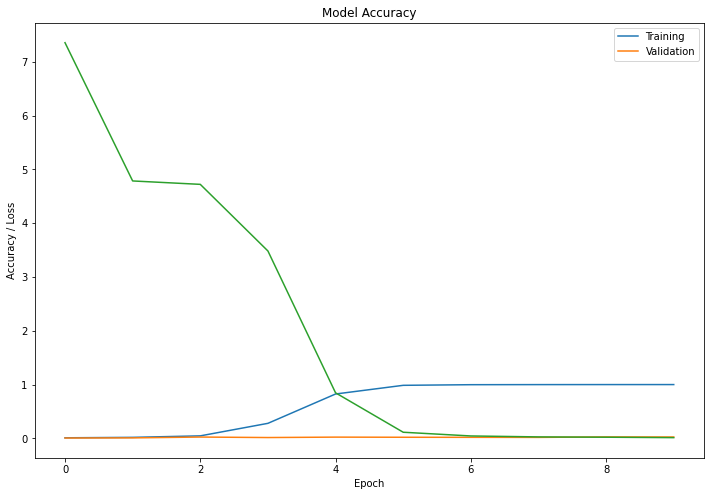

In [0]:
plot_history(history, acc='accuracy', val_acc='val_accuracy', loss='loss')

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
train_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

val_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_datagen = create_model()

In [0]:
model_datagen = compile_model(model_datagen)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
Conv_2 (Conv2D)              (None, 122, 122, 32)      9248      
_________________________________________________________________
flatten_14 (Flatten)         (None, 476288)            0         
_________________________________________________________________
Dense_1 (Dense)              (None, 256)               121929984 
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_datagen = model_datagen.fit_generator(train_generator.flow(x_train_data, y_train_categorical),epochs=10,validation_data=(x_test_data, y_test_categorical))

Epoch 1/10
240/240 [==============================] - 30s 127ms/step - loss: 5.0739 - accuracy: 0.0089 - val_loss: 4.7857 - val_accuracy: 0.0090
Epoch 2/10
240/240 [==============================] - 30s 124ms/step - loss: 4.7835 - accuracy: 0.0112 - val_loss: 4.7843 - val_accuracy: 0.0090
Epoch 3/10
240/240 [==============================] - 30s 125ms/step - loss: 4.7802 - accuracy: 0.0108 - val_loss: 4.7842 - val_accuracy: 0.0090
Epoch 4/10
240/240 [==============================] - 30s 124ms/step - loss: 4.7783 - accuracy: 0.0123 - val_loss: 4.7854 - val_accuracy: 0.0090
Epoch 5/10
240/240 [==============================] - 30s 124ms/step - loss: 4.7776 - accuracy: 0.0123 - val_loss: 4.7859 - val_accuracy: 0.0090
Epoch 6/10
240/240 [==============================] - 30s 124ms/step - loss: 4.7775 - accuracy: 0.0123 - val_loss: 4.7860 - val_accuracy: 0.0090
Epoch 7/10
240/240 [==============================] - 30s 125ms/step - loss: 4.7790 - accuracy: 0.0115 - val_loss: 4.7865 - val_ac

# Model accuracy is still poor!!!

In [0]:
loss_datagen,accuracy_datagen  = model_datagen.evaluate(x_test_data, y_test_categorical, verbose=False)
print("Model accuracy DataGen:" , accuracy_datagen)

Model accuracy DataGen: 0.008998434990644455


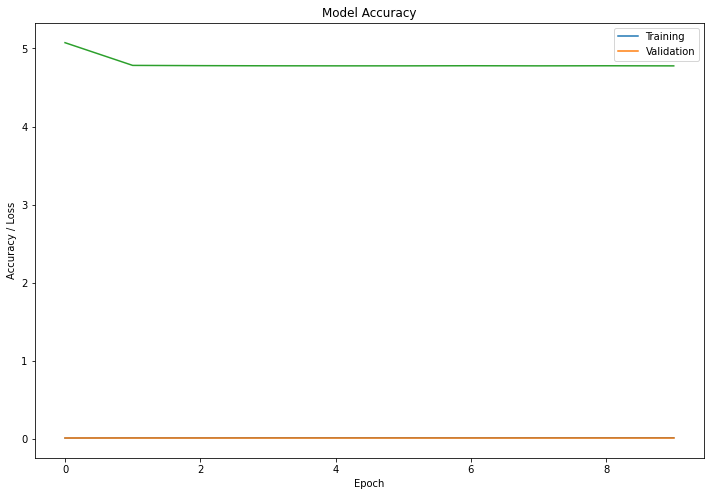

In [0]:
plot_history(history_datagen, acc='accuracy', val_acc='val_accuracy', loss='loss')

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [31]:
print(tensorflow.__version__)
print(tensorflow.keras.__version__)

2.2.0-rc2
2.3.0-tf


In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [33]:
y_train_categorical = to_categorical(y_train_data, num_classes)
y_test_categorical = to_categorical(y_test_data, num_classes)
print("x_train_data shape : ", x_train_data.shape)
print("y_train_categorical shape : ", y_train_categorical.shape)
print("\n")
print("x_test_data shape : ", x_test_data.shape)
print("y_test_categorical shape : ", y_test_categorical.shape)

x_train_data shape :  (7666, 128, 128, 3)
y_train_categorical shape :  (7666, 120)


x_test_data shape :  (2556, 128, 128, 3)
y_test_categorical shape :  (2556, 120)


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg', input_shape=(128,128,3))

Print the summary of the base_model

In [35]:
print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
model_vgg = base_model.output

In [37]:
model_vgg.shape

TensorShape([None, 512])

In [0]:
model_vgg1 = Flatten()(model_vgg)
model_vgg1 = Dense(1024, activation='relu')(model_vgg1)
model_vgg1 = Dense(256, activation='relu')(model_vgg1)
predictions = Dense(120, activation='softmax')(model_vgg1)

In [0]:
#Creating the final model
tl_model = Model(base_model.input,predictions)

In [0]:
# Loss and Optimizer
tl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
tl_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in tl_model.layers[:len(base_model.layers)]:
    layer.trainable = False

In [42]:
for layer in tl_model.layers:
    print("Layer Name : ",layer.name, " \t-- IsTrainable: ", layer.trainable)

Layer Name :  input_1  	-- IsTrainable:  True
Layer Name :  block1_conv1  	-- IsTrainable:  True
Layer Name :  block1_conv2  	-- IsTrainable:  True
Layer Name :  block1_pool  	-- IsTrainable:  True
Layer Name :  block2_conv1  	-- IsTrainable:  True
Layer Name :  block2_conv2  	-- IsTrainable:  True
Layer Name :  block2_pool  	-- IsTrainable:  True
Layer Name :  block3_conv1  	-- IsTrainable:  True
Layer Name :  block3_conv2  	-- IsTrainable:  True
Layer Name :  block3_conv3  	-- IsTrainable:  True
Layer Name :  block3_pool  	-- IsTrainable:  True
Layer Name :  block4_conv1  	-- IsTrainable:  True
Layer Name :  block4_conv2  	-- IsTrainable:  True
Layer Name :  block4_conv3  	-- IsTrainable:  True
Layer Name :  block4_pool  	-- IsTrainable:  True
Layer Name :  block5_conv1  	-- IsTrainable:  True
Layer Name :  block5_conv2  	-- IsTrainable:  True
Layer Name :  block5_conv3  	-- IsTrainable:  True
Layer Name :  block5_pool  	-- IsTrainable:  True
Layer Name :  global_average_pooling2d  	

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
b_size = 128
epoch = 10

In [44]:
history_tl = tl_model.fit(x_train_data, y_train_categorical, batch_size=b_size, epochs=epoch, validation_split=0.1)

Epoch 1/10
54/54 [==============================] - 71s 1s/step - loss: 4.8126 - accuracy: 0.0093 - val_loss: 4.7862 - val_accuracy: 0.0117
Epoch 2/10
54/54 [==============================] - 58s 1s/step - loss: 4.7846 - accuracy: 0.0120 - val_loss: 4.7872 - val_accuracy: 0.0117
Epoch 3/10
54/54 [==============================] - 58s 1s/step - loss: 4.7814 - accuracy: 0.0113 - val_loss: 4.7869 - val_accuracy: 0.0039
Epoch 4/10
54/54 [==============================] - 57s 1s/step - loss: 4.7786 - accuracy: 0.0132 - val_loss: 4.7885 - val_accuracy: 0.0039
Epoch 5/10
54/54 [==============================] - 56s 1s/step - loss: 4.7772 - accuracy: 0.0132 - val_loss: 4.7897 - val_accuracy: 0.0039
Epoch 6/10
54/54 [==============================] - 56s 1s/step - loss: 4.7765 - accuracy: 0.0132 - val_loss: 4.7906 - val_accuracy: 0.0039
Epoch 7/10
54/54 [==============================] - 56s 1s/step - loss: 4.7765 - accuracy: 0.0132 - val_loss: 4.7906 - val_accuracy: 0.0039
Epoch 8/10
54/54 [==

In [45]:
loss_tl,accuracy_tl  = tl_model.evaluate(x_test_data, y_test_categorical, verbose=False)
print("Model Accuracy - Transfer Learning:" , accuracy_tl)

Model Accuracy - Transfer Learning: 0.008998434990644455


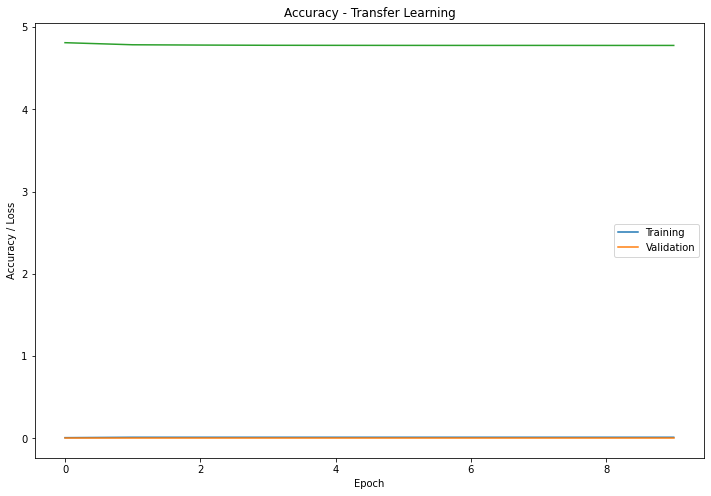

In [80]:
plot_history(history_tl, title = 'Accuracy - Transfer Learning', acc='accuracy', val_acc='val_accuracy', loss='loss')